In [28]:
from IPython.display import Image

## My talk is based on the contributions from:

## https://alexa-skills-kit-python-sdk.readthedocs.io/en/latest/DEVELOPING_YOUR_FIRST_SKILL.html#option-1-implementation-using-classes

## Ralu Bolovan, AWS Engineer https://medium.freecodecamp.org/a-beginners-guide-to-the-new-aws-python-sdk-for-alexa-105c0ed45f4e

## Talk Python to Me Podcast https://talkpython.fm/episodes/show/146/building-alexa-skills-with-python-and-flask

# The ASK SDK for Python requires Python 2 (>= 2.7) or Python 3 (>= 3.6)

# pip install ask-sdk

## Unfortunately, conda does not have ask-sdk as part of their packages so I will be doing part of my tutorial in PyCharm

# Prerequisites:

## 1) An <font color='red'>Amazon Developer account</font>. This is required to create and configure Alexa skills.

## To build a custom, Python skill, you need:

## An Internet-accessible endpoint for hosting your cloud-based service.

## 2a) The simplest option for this is to use <font color='red'>AWS Lambda</font> (an Amazon Web Services offering). In this case, you need an account with Amazon Web Services in addition to your Amazon developer account. My example today is using the AWS Lambda service.

## 2b) Alternatively, you can build and <font color='red'>host an HTTPS web service</font>. In this case, you will need a cloud hosting provider with Python installed and an SSL certificate.

## A custom skill needs to respond to events sent by the Alexa service. For instance, when you ask your Alexa device (e.g. Echo, Echo Dot, Echo Show, etc.) to ‘open my skill’, your skill needs to respond to the LaunchRequest that is sent to your ‘my example’ skill. 

## Alexa skills are two words. The below example is called "My Example". My talk today will be on the alexa skill I created called <font color='blue'>"Hello Zen"</font>. Based on PEP20; the Zen of Python.
https://www.python.org/dev/peps/pep-0020/

## When the user says: “Open My example,” the “My example” is the skill’s Invocation name, which Alexa uses to communicate. The user’s device passes what the user said to the “My example” skill.

## At this point, Alexa uses the skill’s Interaction model to understand what the user requested. The interaction model is a JSON file that maps what the user says to a request type. In this case, it will map it to the built-in AMAZON.LaunchRequest

## Next, it calls its backend https endpoint, (AWS Lambda function), which receives the identified request.

## The Lambda searches for a function that can handle the LaunchRequest and executes it.

## This function then returns a response that gets sent back all the way up to the user’s device. At this point, the “My example” skill will greet them and will be able to accept further user requests.

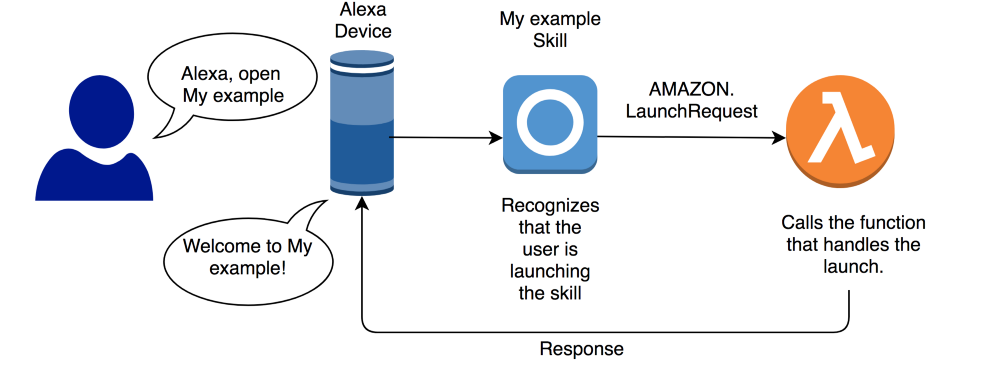

In [29]:
Image(filename='./alexa_process_flow.png') 

## With the ASK SDK for Python, you simply need to write a request handler, which is code to handle incoming requests(ex. LaunchRequest object) and return a response. 

## Your code is responsible for making sure that the right request handler is used to process incoming requests and for providing a response. The ASK SDK for Python provides two ways to create request handlers:

## Class: Implement the <font color='red'>AbstractRequestHandler</font> class under ask_sdk_core.dispatch_components package. The class should contain implementations for:
## * <font color='red'>can_handle</font> method
## * <font color='red'>handle</font> method 

## Decorator: Use the <font color='red'>request_handler</font> decorator in an instantiated skill builder object to tag functions that act as handlers for different incoming requests. 

## This talk will focus on just the <font color='blue'>class</font> implementation of the ASK SDK

## The <font color='red'>can_handle</font> method returns a Boolean value indicating if the request handler can create an appropriate response for the request. The can_handle method has access to the request type and additional attributes that the skill may have set in previous requests or even saved from a previous interaction.


## Below is a "Hello World" example

## The following code example below shows how to configure a handler to be invoked, "calling the object and corresponding methods", when the skill receives a LaunchRequest. The LaunchRequest event occurs when the skill is invoked without a specific intent.

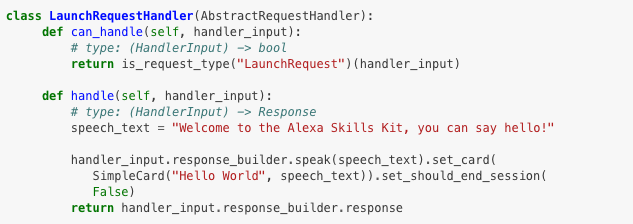

In [30]:
Image(filename='./launch_request.png') 

## Intents in Alexa represent an action that fulfills a user's spoken request

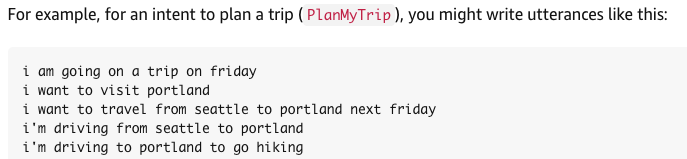

In [31]:
Image(filename='./alexa_intents_ex.png')

## The <font color='red'>can_handle</font> method returns True if the incoming request is a LaunchRequest. In the above example, the handle function generates and returns a basic greeting response.

## speech_text = "Welcome to the Alexa Skills Kit, you can say hello!"

## The following code example shows how to configure a handler to be invoked when the skill receives an intent request with the name HelloWorldIntent. 

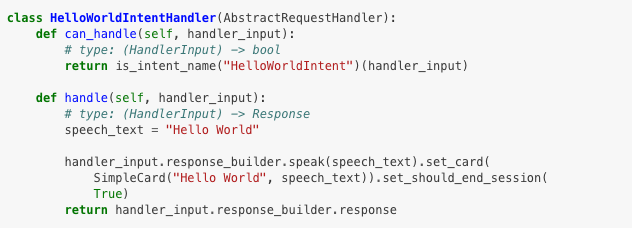

In [32]:
Image(filename='./hello_world_handler.png') 

## Intents are defined in the Alexa Developer Console as the image below displays

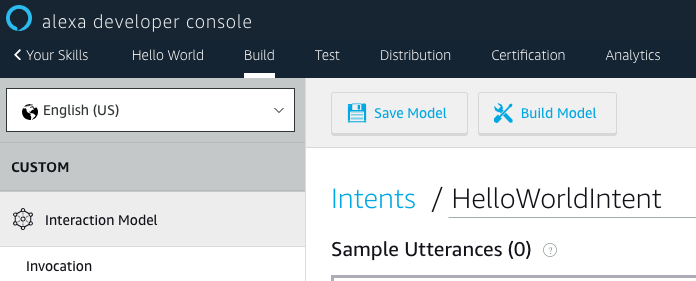

In [33]:
Image(filename='./hello_world_intent.png') 

## The <font color='red'>can_handle</font> method detects if the incoming request is an IntentRequest, and returns True if the intent name is HelloWorldIntent. The <font color='red'>handle</font> method generates and returns a basic “Hello World” response as assigned above in the  <font color='blue'>speech_text</font> attribute.

## Create a new skill by following these steps:

## *Log in to the Alexa Skills Kit Developer Console.
## *Click the Create Skill button in the upper right.
## *Enter “YourSkillName” as your skill name and click Next.
## *For the model, select Custom and click Create skill.

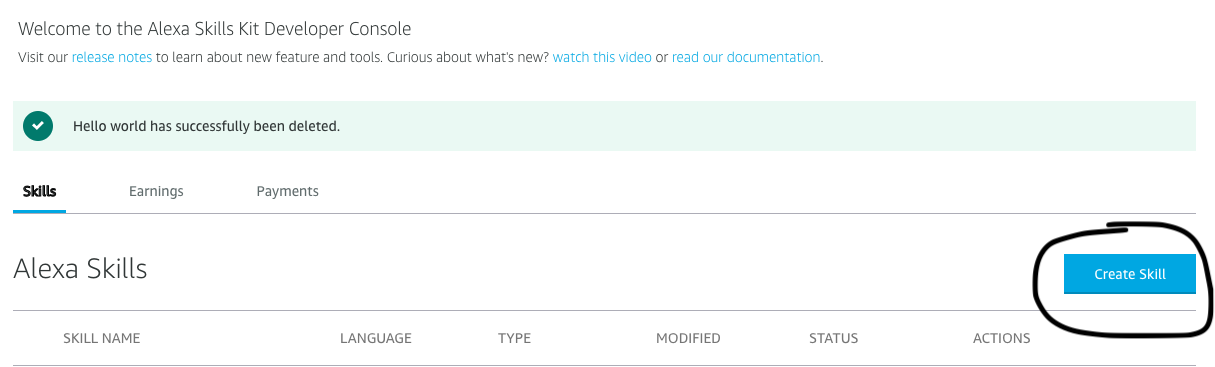

In [34]:
Image(filename='./alexa_step_1.png') 

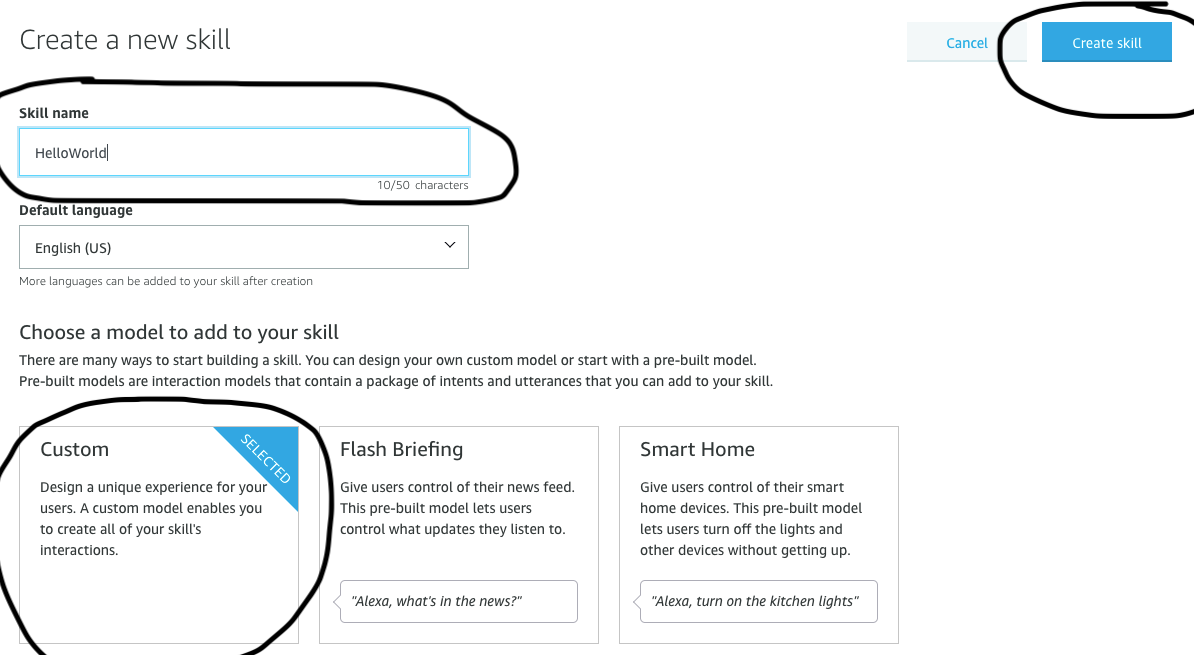

In [35]:
Image(filename='./alexa_step_2.png') 

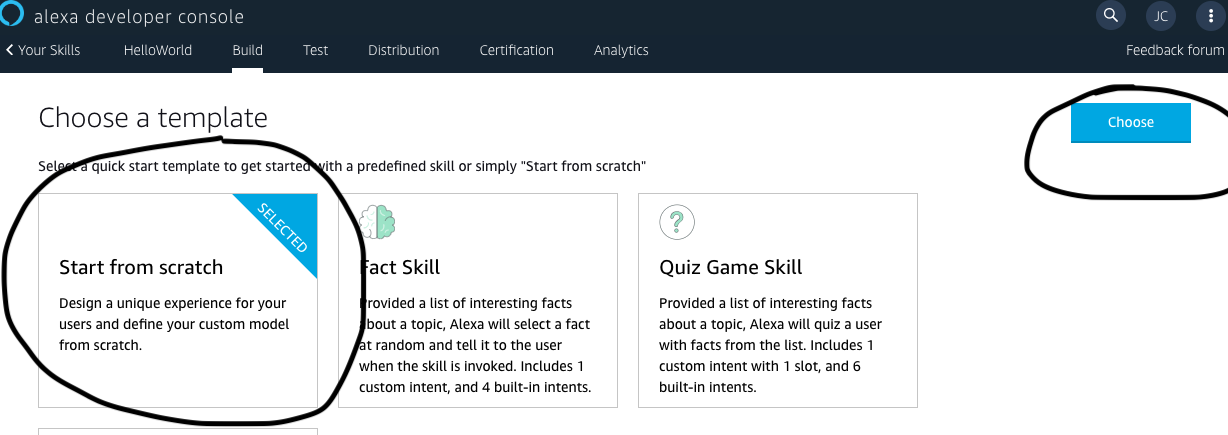

In [36]:
Image(filename='./alexa_step_3.png') 

## Create your Invocation name
## For example, "hello world". 
## "hello zen" was the name of Invocation for my hello zen skill

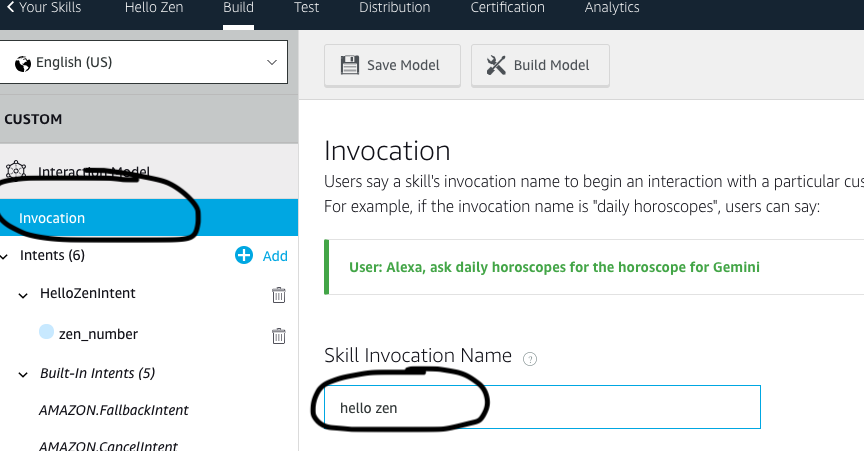

In [37]:
Image(filename='./alexa_step_4.png') 

## Create your Intents of how Alexa should interact with your users. My custom intent is <font color='red'>HelloZenIntent</font>. This is in JSON format

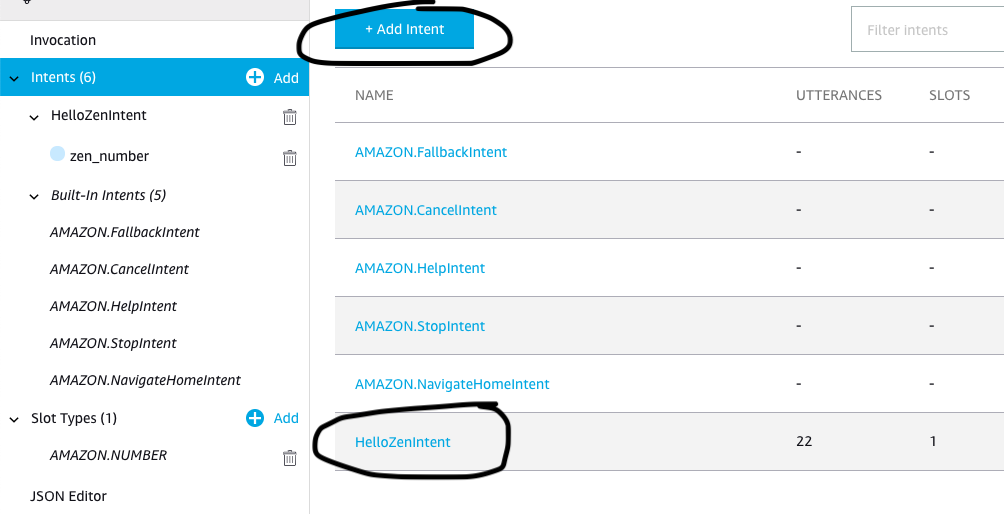

In [38]:
Image(filename='./alexa_step_5.png') 

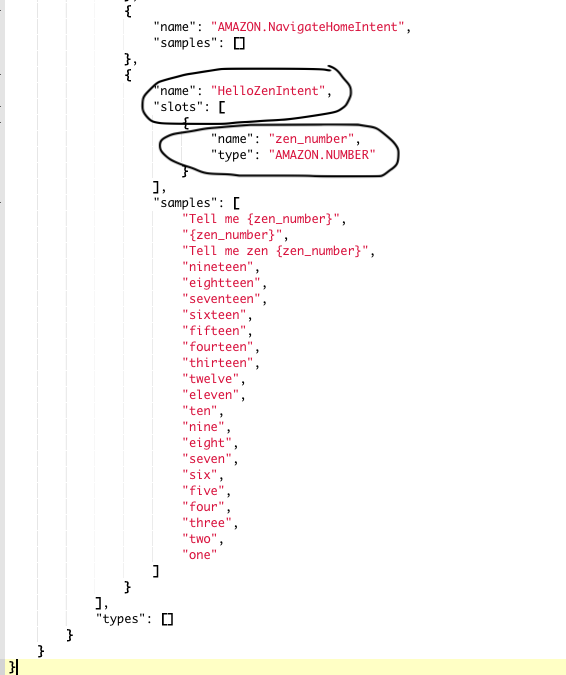

In [39]:
Image(filename='./alexa_step_6.png') 

## In my above example, I created a slot "zen_number". A slot is an argument given to an intent.

## In my interaction model that I defined in my Alexa console, I told Alexa that we can support a user saying a number and that it should be mapped to one via the built-in Amazon.NUMBER

## Since there are 19 written zens, I wanted the user to be able to ask Hello Zen, tell me {zen_number} and return the appropriate design aphorisms

### *aphorisms: a concise statement of a scientific principle, typically by an ancient classical author

## Fun fact:  According to Guido, the 20th zen is "some bizarre Tim Peters in-joke". That, and/or (still according to him) it's an opportunity for people to provide their own addition (as largely is happening when people ask the question today.
https://stackoverflow.com/questions/4504487/the-zen-of-python-distils-the-guiding-principles-for-python-into-20-aphorisms-bu

## Under your skill, click the Endpoint tab, select AWS Lambda ARN, and copy the Skill ID of the skill you just created and the region. You can use another Endpoint besides AWS Lambda, but this gets a lot more complicated...

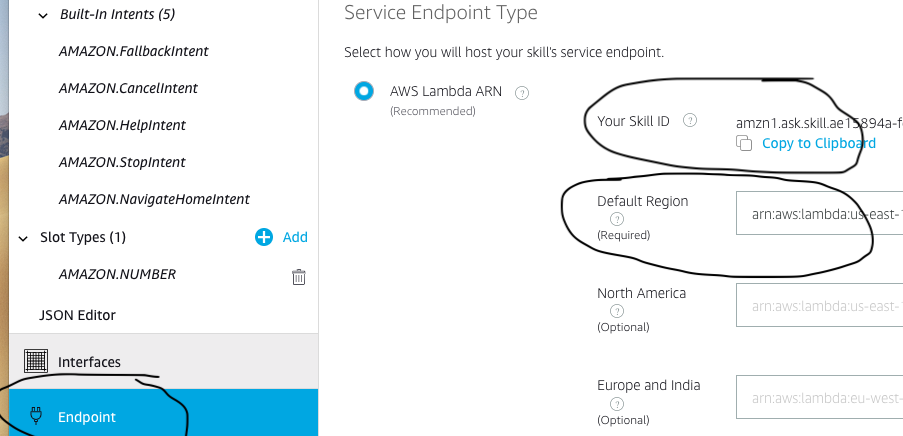

In [40]:
Image(filename='./alexa_step_7.png') 

## Go to your virtual environment with all your dependicies and zip the file. For example in your_path/site-packages to create a function.zip to upload to AWS Lamba
## zip -r9 ../function.zip .

## Then upload the zip file to AWS Lambda

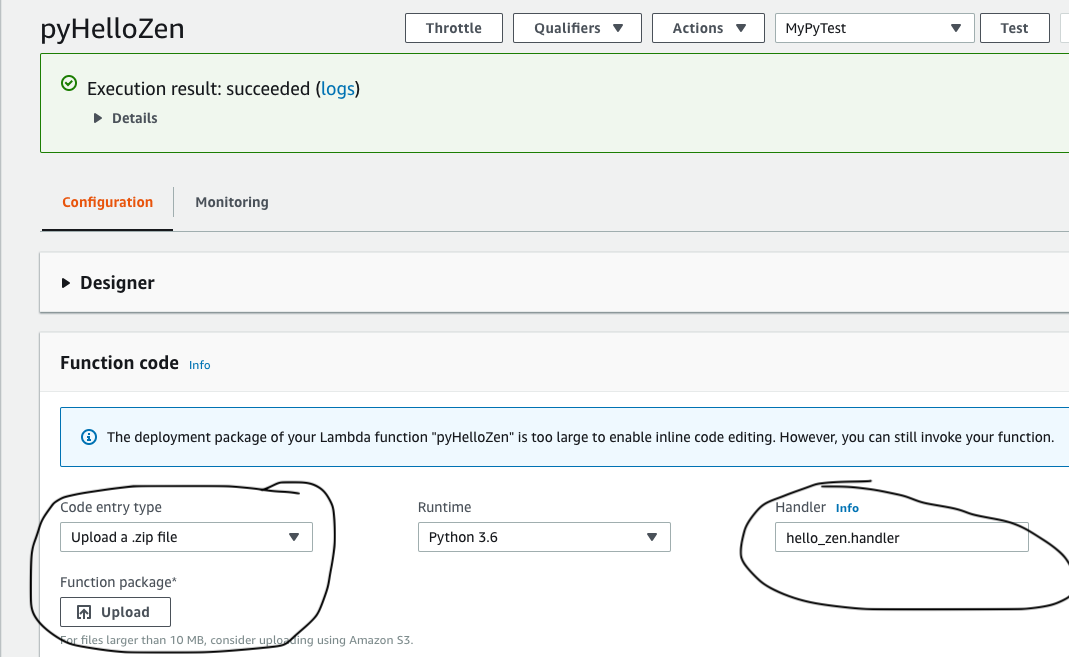

In [41]:
Image(filename='./alexa_step_8.png') 

## Found below is an excerpt of my python code I created for my hello zen skill
## The source code is on my Github page, link below: 
https://github.com/jcamier/alexa_hello_zen_python/blob/master/hello_zen.py

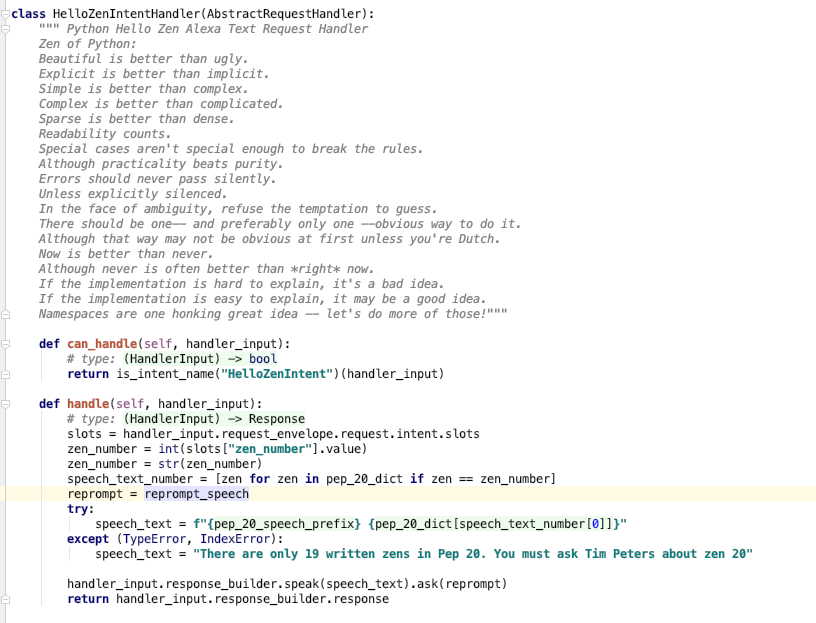

In [42]:
Image(filename='./hello_zen_intent_handler.png') 

## Now, I will present the final result...
## "Hello zen"
## "Tell me zen one"
## "Tell me zen two"
## "Tell me zen nineteen"
## "Tell me zen twenty"

# <font color='green'>Thank you!</font>